# I. 
Тут я даже смог найти данные!

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
x = np.loadtxt("Rainfall.txt", skiprows = 1)
x

array([146.8, 383. ,  90.9, 178.1, 267.5,  95.5, 156.5, 180. ,  90.9,
       139.7, 200.2, 171.7, 187.2, 184.9,  70.1,  58. ,  84.1,  55.6,
       133.1, 271.8, 135.9,  71.9,  99.4, 110.6,  47.5,  97.8, 122.7,
        58.4, 154.4, 173.7, 118.8,  88. ,  84.6, 171.5, 254.3, 185.9,
       137.2, 138.9,  96.2,  85. ,  45.2,  74.7, 264.9, 113.8, 133.4,
        68.1, 156.4])

<AxesSubplot:ylabel='Count'>

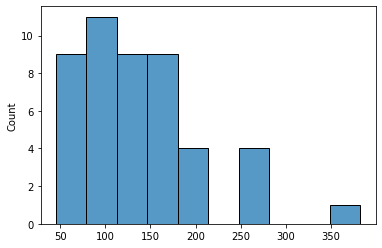

In [10]:
sns.histplot(x, bins = 10)

Данных достаточно мало, визуально сложно что-то сказать

Вспомним вообще, какие критерии распределений у нас есть:
- Андерсона-Дарлинга
- Колмогорова-Смирнова
- Хи-квадрат для частот (он не непрерывный)
Дальше ужо не помню...

Я бы взял АД и КС:

In [13]:
ad = scipy.stats.anderson(x, 'expon')
ad

AndersonResult(statistic=6.19343418343302, critical_values=array([0.91 , 1.064, 1.324, 1.586, 1.932]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Наша статистика равна $6.19$, а критическое значение на уровне $alpha = 0.05$ равно $1.32$. Андерсон-Дарлинг предлагает гипотезу отвергать

In [16]:
ks = scipy.stats.kstest(x, scipy.stats.expon.cdf)
ks

KstestResult(statistic=1.0, pvalue=0.0)

p-value 0.0 явно показывает, что оно меньшк 0.05 а значит гипотезу снова надо отвергать

# II.

Сделаем всё то же самое для нормального распределения:

In [17]:
ad = scipy.stats.anderson(x, 'norm')
ad

AndersonResult(statistic=1.0860472352144512, critical_values=array([0.536, 0.611, 0.733, 0.855, 1.017]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [18]:
ks = scipy.stats.kstest(x, scipy.stats.norm.cdf)
ks

KstestResult(statistic=1.0, pvalue=0.0)

Снова оба критерия говорят отвергать гипотезу. Увы и ах